In [2]:
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime as dt

In [3]:
root = 'C:/Users/yabec/Desktop/segregation_outputdata/github_data/'
auxdata = root+"auxdata/"

In [4]:
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

# Fig 1A

In [4]:
city_name = 'boston'
boston = gpd.read_file(auxdata+city_name+"_pop_income.geojson", driver="GeoJSON")
boston["cent_x"] = boston.centroid.x
boston["cent_y"] = boston.centroid.y
boston.CensusBlockGroup = boston.CensusBlockGroup.astype("str")
boston["dummy"] = 0
boston_plot = boston[boston["population"]>100].dissolve(by="dummy")

<ipython-input-4-1c4477812d21>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  boston["cent_x"] = boston.centroid.x
<ipython-input-4-1c4477812d21>:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  boston["cent_y"] = boston.centroid.y


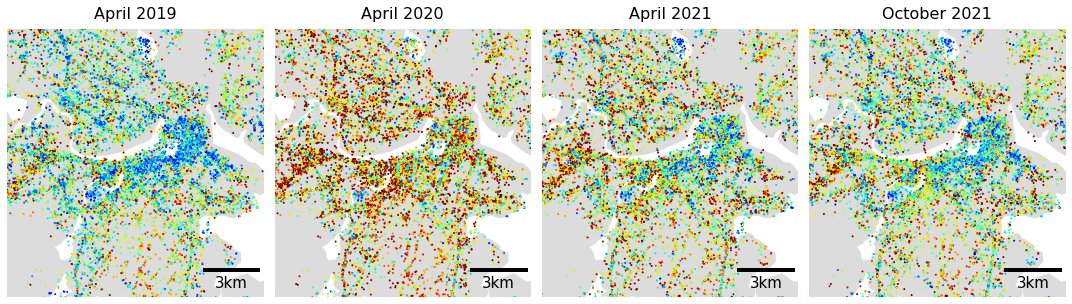

In [5]:
fig,ax = plt.subplots(1,4,gridspec_kw={'width_ratios':[1,1,1,1]}, figsize=(15,4.5))
fig.patch.set_facecolor('white')

for i,(thisdate,title) in enumerate(zip(["2019-04-01","2020-04-01","2021-04-01","2021-10-01"], 
                                        ["April 2019","April 2020","April 2021","October 2021"])):

    df = pd.read_csv(root+"fig1/"+thisdate+"_fig1A.csv")    
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.poilon,df.poilat))

    if i==4:
        axins1 = inset_axes(ax[i], width="5%", height="90%", loc='lower left', bbox_to_anchor=(1.05, 0.05, 1, 1),
                            bbox_transform=ax[i].transAxes, borderpad=0.1)
        axins1.set_ylabel("Income Segregation", fontsize=14)
        axins1.tick_params(labelsize=13)
        gdf.plot(ax=ax[i], column="placeseg", cmap="jet", s=1, zorder=3, vmin=0, vmax=1, cax=axins1, legend=True)
    else:
        gdf.plot(ax=ax[i], column="placeseg", cmap="jet", s=1, zorder=3, vmin=0, vmax=1)
        
    boston_plot.plot(ax=ax[i], color="gainsboro", zorder=1)
    
    ### scale bar
    ax[i].text((0.1+1.5/110)/0.13, 0.035, "3km", transform=ax[i].transAxes, size=15, ha="center")
    ax[i].plot([-71.05,-71.05+(3/110)],[42.31,42.31], color="k", linewidth=4, zorder=5)
    ax[i].set_xlim(-71.15, -71.02)
    ax[i].set_ylim(42.3, 42.4)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].axis('off')
    ax[i].set_title(title, fontsize=16, pad=10)

plt.tight_layout()
plt.show()

# Fig 1B

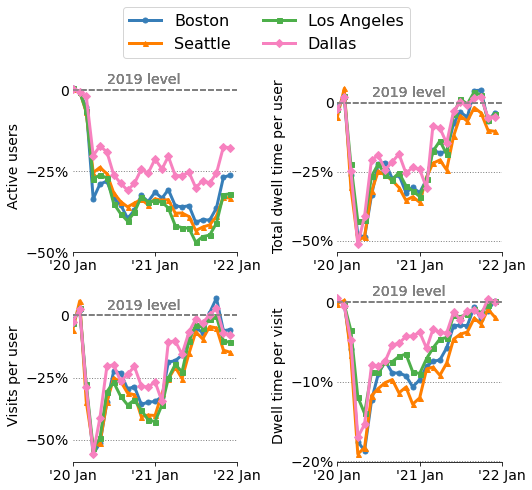

In [7]:
df = pd.read_csv(root+"fig1/"+"fig1B.csv")    

fig,ax = plt.subplots(2,2,figsize=(7.5,6))
for i,(label,ylabs,yticklabs,anno) in enumerate(zip(['Active users','Visits per user', 'Total dwell time per user', 'Dwell time per visit'], 
                                                    [[50,75,100],[50,75,100],[50,75,100],[80,90,100]],
                                                    [[r'$\minus$50%',r'$\minus$25%','0'],[r'$\minus$50%',r'$\minus$25%','0'],
                                                     [r'$\minus$50%',r'$\minus$25%','0'],[r'$\minus$20%',r'$\minus$10%','0']],
                                                    [102,102,102,100.8])):
    x = i%2
    y = i//2
    hlab = "2019 trend"
    for city_name,lab,col,mark in zip(["boston","seattle",'la','dallas'],
                                      ["Boston","Seattle",'Los Angeles','Dallas'],
                                      [CB_color_cycle[0],CB_color_cycle[1],CB_color_cycle[2],CB_color_cycle[3]],
                                      ["o","^",'s',"D"]):
        ### paths
        thisvari = df[(df["city"]==city_name)&(df["variable"]==label)]
        thisvari["date"] = pd.to_datetime(thisvari["date"])
        if (i!=0):
            lab = None
            hlab = None
        ax[x,y].plot(thisvari["date"], thisvari["value"], label=lab, color=col, marker=mark, linewidth=3, markersize=5)
        ax[x,y].axhline(100, color='gray', linestyle="--")
        ax[x,y].annotate("2019 level", xy=(dt.strptime("2020-06-01","%Y-%m-%d"),anno), fontsize=14, color='gray')
    # ax[x,y].plot([],[], color="gray", linestyle="--", label=hlab)
    ax[x,y].xaxis.set_major_formatter(DateFormatter('%Y/%m'))
    ax[x,y].set_xticks(["2020-01-01","2021-01-01","2022-01-01"])
    ax[x,y].set_xticklabels(["'20 Jan","'21 Jan","'22 Jan"], fontsize=14)
    ax[x,y].set_yticks(ylabs)
    ax[x,y].set_yticklabels(yticklabs, fontsize=14)
    ax[x,y].set_xlim(dt.strptime("2020-01-01","%Y-%m-%d"), dt.strptime("2022-01-01","%Y-%m-%d"))
    ax[x,y].spines['left'].set_visible(False)
    ax[x,y].spines['right'].set_visible(False)
    ax[x,y].spines['top'].set_visible(False)
    ax[x,y].set_ylabel(label, fontsize=14)
    ax[x,y].tick_params(axis=u'y', which=u'both',length=0)
    for ytic in ylabs:
        if ytic!=100:
            ax[x,y].axhline(ytic, color='gray', linestyle=":",linewidth=1,  zorder=1)
fig.legend(ncol=2, loc="lower center", bbox_to_anchor=(.5,.99), fontsize=16)
plt.tight_layout()
plt.show()

# Fig 1C

In [11]:
pseg_y = [-30,-15,0]
iseg_y = [-10,-5,0]
pseg_yticks = [r'$\minus$30%',r'$\minus$15%','2019\nlevel']
iseg_yticks = [r'$\minus$10%',r'$\minus$5%','2019\nlevel']

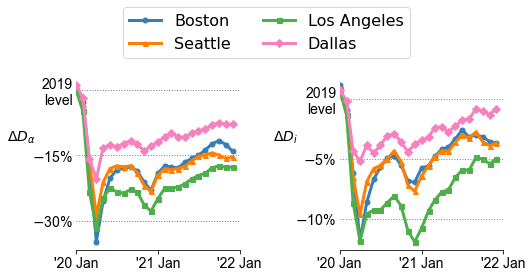

In [12]:
df = pd.read_csv(root+"fig1/"+"fig1C.csv")    

fig,ax = plt.subplots(1,2,figsize=(7.5,3))
for i,(vari,seglab,ylabels,yticks) in enumerate(zip(["poi_placeseg","uid_indivseg"],
                                                    [r"$D_{\alpha}$",r"$D_i$"],
                                                    [pseg_y,iseg_y],[pseg_yticks,iseg_yticks])):
    for j,(city_name,nom,col,mark) in enumerate(zip(["boston","seattle",'la','dallas'],
                                                    ["Boston","Seattle",'Los Angeles','Dallas'],
                                                    [CB_color_cycle[0],CB_color_cycle[1],CB_color_cycle[2],CB_color_cycle[3]],
                                                    ["o","^",'s',"D"])):
        this = df[(df['city']==city_name)&(df['variable']==vari)]
        this["date"] = pd.to_datetime(this["date"])
        if i!=0:
            nom = None
            hlab = None
        ax[i].plot(this.date, this['value'], label=nom,color=col, linewidth=3, marker=mark, markersize=5, zorder=3)

    ax[i].spines['left'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].xaxis.set_major_formatter(DateFormatter('%Y/%m'))
    ax[i].set_ylabel(r"$\Delta$"+seglab, fontsize=14, rotation=0, labelpad=10, y=.6)
    ax[i].set_xticks(["2020-01-01","2021-01-01","2022-01-01"])
    ax[i].set_xticklabels(["'20 Jan","'21 Jan","'22 Jan"], fontsize=14, family='Arial')
    ax[i].set_xlim(dt.strptime("2020-01-01","%Y-%m-%d"), dt.strptime("2022-01-01","%Y-%m-%d"))
    ax[i].set_yticks(ylabels)
    ax[i].set_yticklabels(yticks, fontsize=14, family='Arial')
    for yla in ylabels:
        ax[i].axhline(yla, linestyle=':', linewidth=1, color='gray', zorder=1)
    ax[i].tick_params(axis=u'y', which=u'both',length=0)
fig.legend(ncol=2, loc="lower center", bbox_to_anchor=(.5,1), fontsize=16)
plt.tight_layout()
plt.show()    

# Fig 1D

In [13]:
cats_col = {'Arts / Museum': 'b', 'City / Outdoors':'r', 'Coffee / Tea':'brown',
            'Entertainment':'gray', 'Food':'orange', 'Grocery':'cyan',
            'Health':'pink', 'Service':'purple', 'Shopping':'g', 'Transportation':'skyblue'}
cats_lab = {'Arts / Museum': 'Museums', 'City / Outdoors':'Outdoors', 'Coffee / Tea':'Coffee',
            'Entertainment':'Leisure', 'Food':'Food', 'Grocery':'Grocery',
            'Health':'Health', 'Service':'Service', 'Shopping':'Shopping', 'Transportation':'Transport'}

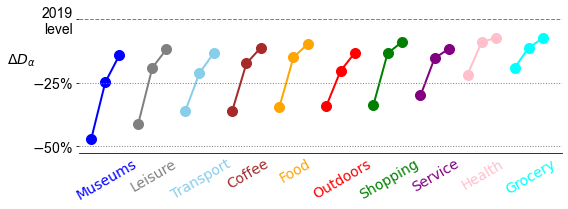

In [14]:
df = pd.read_csv(root+"fig1/"+"fig1D.csv")    
fig,ax = plt.subplots(figsize=(8,3))

taxes = []
xlabels = []
for tax in df.tax.unique():
    taxes.append(tax)
    xlabels.append(cats_lab[tax])
    dfthis = df[df['tax']==tax]
    ax.plot(dfthis['month'], dfthis['val'], color=dfthis['color'].values[0], linewidth=2, marker="o", markersize=10)

ax.axhline(-50, linestyle=':', color="gray", linewidth=1)
ax.axhline(-25, linestyle=':', color="gray", linewidth=1)
ax.axhline(0, linestyle='--', color="gray", linewidth=1)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel(r"$\Delta D_{\alpha}$", fontsize=14, rotation=0, labelpad=10, y=.6)
ax.set_yticks([-50,-25,0])
ax.set_yticklabels([r'$\minus$50%',r'$\minus$25%','2019\nlevel'], fontsize=14, family='Arial')
ax.set_xticks(np.arange(len(cats_col))+0.22*1.5)
ax.set_xticklabels(xlabels, fontsize=14, rotation=30)

for xtick, tax in zip(ax.get_xticklabels(), taxes):
    color = cats_col[tax]
    xtick.set_color(color)

ax.set_xlim(-.25,len(cats_col))
ax.tick_params(axis=u'x', which=u'both',length=0)

fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()    